In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
data = pd.read_csv("CleanedData.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
x = data.dropna(inplace=True)

In [ ]:
data['age'] = pd.to_numeric(data['age'] , errors = 'coerce')
data = data[data['age'] >= 0]
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
data.drop(['fnlwgt'] ,axis = 1 , inplace = True)

<ipython-input-7-0228f21a74c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
<ipython-input-7-0228f21a74c6>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = data.cov()


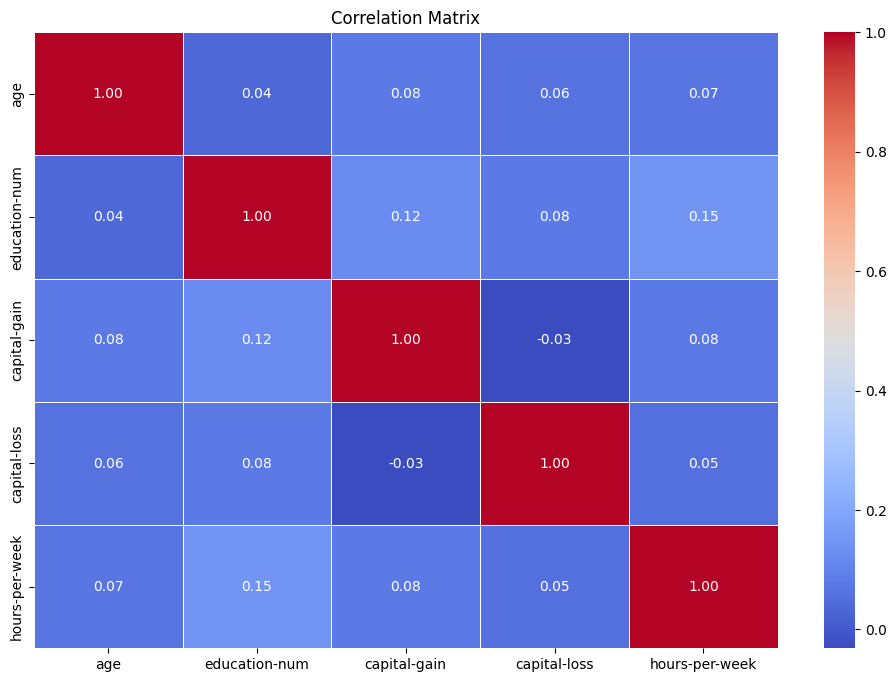

In [ ]:
correlation_matrix = data.corr()
covariance_matrix = data.cov()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Q - 1
Sex = data["sex"].value_counts()
print(Sex)

Male      21790
Female    10771
Name: sex, dtype: int64


In [ ]:
# Q - 2
Female = data[data['sex'] == 'Female']['age'].mean()
print("Average Age of Female : ", Female )

Average Age of Female :  36.85823043357163


In [ ]:
# Q - 3
US_Citizens = data[data['native-country'] == 'United-States'].shape[0]
print("United States Citizens : " , US_Citizens)

United States Citizens :  29170


In [ ]:
# Q - 4
greaterthan50_std = data[data['salary'] == '>50K']['age'].std()
greaterthan50k_mean = data[data['salary'] == '>50K']['age'].mean()
lessthan50_std = data[data['salary'] == '<=50K']['age'].std()
greaterthan50_mean = data[data['salary'] == '<=50K']['age'].mean()

print("Standard deviation less than 50K:", greaterthan50_std)
print("Mean Greater than 50K:", greaterthan50k_mean)
print("Standard deviatino greater than or euqal to 50K:", lessthan50_std)
print("Mean less than or equal to 50K:", greaterthan50_mean)

Standard deviation less than 50K: 10.519027719851826
Mean Greater than 50K: 44.24984058155847
Standard deviatino greater than or euqal to 50K: 14.02008849082488
Mean less than or equal to 50K: 36.78373786407767


In [ ]:
# Q - 5
MoreThan50k = data[data['salary'] == '>50K']['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']).all()
print("People Earning more than 50K have high school education ? \nAnswer:", MoreThan50k)

People Earning more than 50K have high school education ? 
Answer: False


In [ ]:
# Q - 6
age_stats = data.groupby(['race', 'sex'])['age'].describe()
max_age = data[(data['race'] == 'Amer-Indian-Eskimo') & (data['sex'] == 'Male')]['age'].max()
print("Max Age of men in Amer-Indian-Eskimo race:", max_age)
print(age_stats)

Max Age of men in Amer-Indian-Eskimo race: 82
                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                 

In [ ]:
# Q - 7
data['is_married'] = data['marital-status'].apply(lambda status: status.startswith('Married'))
more_50k_married = data[(data['sex'] == 'Male') & (data['is_married'] == True)]['salary'].value_counts(normalize=True).loc['>50K']
more_50k_single = data[(data['sex'] == 'Male') & (data['is_married'] == False)]['salary'].value_counts(normalize=True).loc['>50K']
print("Earning greater than 50K among married men (Proportion) : ", more_50k_married)
print("Earning greater than 50K among single men (Proportion) : ", more_50k_single)

Earning greater than 50K among married men (Proportion) :  0.4405139945351156
Earning greater than 50K among single men (Proportion) :  0.08449509031397745


In [ ]:
# Q - 8
maxhoursperweek = data['hours-per-week'].max()
peopleworkingmaxhours = data[data['hours-per-week'] == maxhoursperweek].shape[0]
earningmore50k = data[(data['hours-per-week'] == maxhoursperweek) & (data['salary'] == '>50K')].shape[0] / peopleworkingmaxhours * 100
print("Max hours working per week:", maxhoursperweek)
print("Number of people working in this hours : ", peopleworkingmaxhours)
print("People earning more than 50K among them (Percentage) : ", earningmore50k)

Max hours working per week: 99
Number of people working in this hours :  85
People earning more than 50K among them (Percentage) :  29.411764705882355


In [ ]:
# Q - 9
hoursperweek = data.groupby(['native-country', 'salary'])['hours-per-week'].mean()
print("Hours per week for each country and salary level (Average) : ")
print(hoursperweek)

Hours per week for each country and salary level (Average) : 
native-country  salary
?               <=50K     40.164760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 82, dtype: float64
